# 1. Importing Libraries


In [100]:
import pandas as pd 
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import mean_squared_error, root_mean_squared_error,  r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Loading and Exploring the Data

In [101]:
df = pd.read_csv('data/BostonHousing.csv')

In [102]:
df.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'b', 'lstat', 'medv'],
      dtype='object')

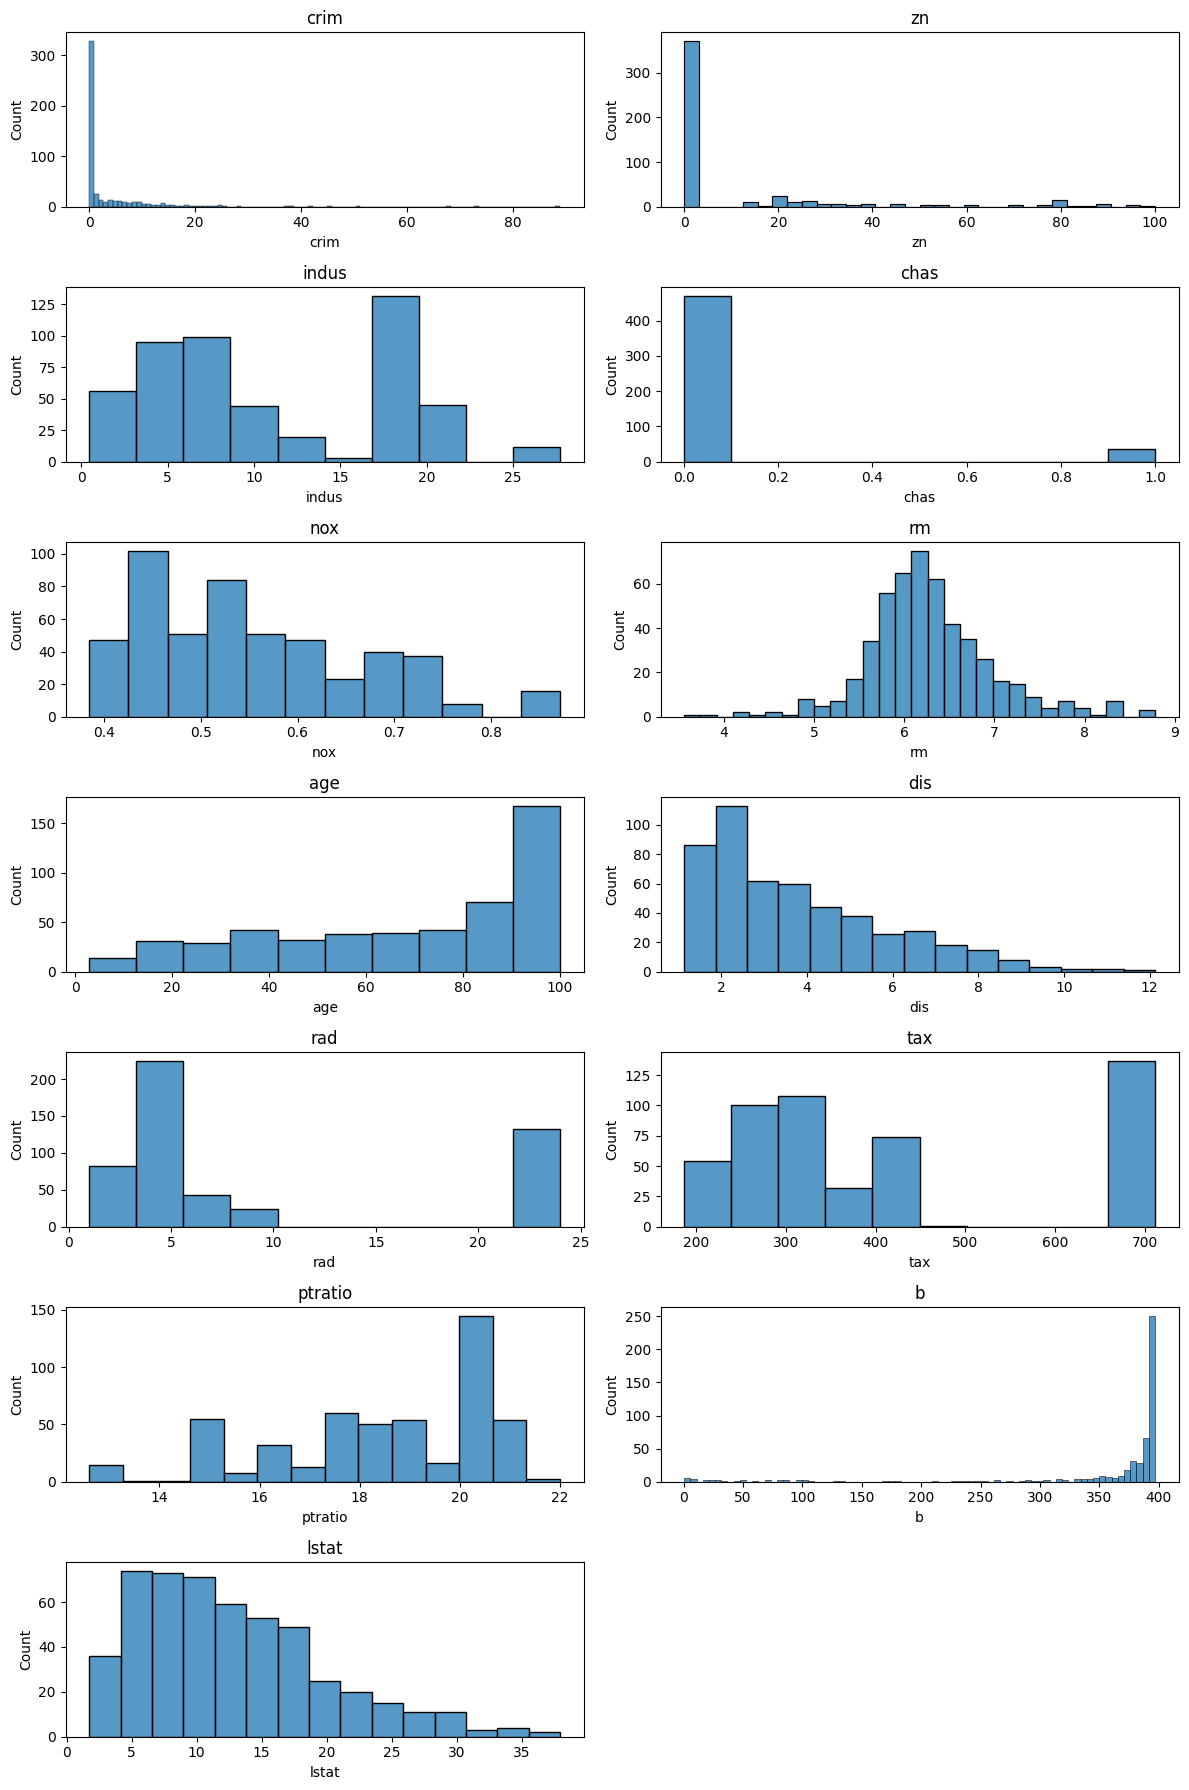

In [103]:
columnas = ['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'ptratio', 'b', 'lstat']
plt.figure(figsize=(12, 18))

for i, col in enumerate(columnas, 1):
    plt.subplot(len(columnas) // 2 + len(columnas) % 2, 2, i)
    sns.histplot(df[col].dropna(), kde=False)
    plt.title(col)

plt.tight_layout()
plt.show()

# 3. Data Cleaning and Preparation

In [104]:
df.corr()['medv']

crim      -0.388305
zn         0.360445
indus     -0.483725
chas       0.175260
nox       -0.427321
rm         0.695360
age       -0.376955
dis        0.249929
rad       -0.381626
tax       -0.468536
ptratio   -0.507787
b          0.333461
lstat     -0.737663
medv       1.000000
Name: medv, dtype: float64

In [105]:
best_features = [a for a, b in df.corr()['medv'].items() if abs(b) >= 0.35]

# 4. Scaling or Normalizing Data


# 5. Model Building and Training


In [106]:
x_train, x_test, y_train, y_test = train_test_split(df.drop(columns='medv'), df['medv'],test_size=0.25, random_state=42)

## Functions

In [107]:
metrics_list = []
def metrics(model, y_test, predictions):
    rmse = root_mean_squared_error(y_test, predictions)
    mse = mean_squared_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    metrics_list.append([model,rmse,mse,r2])

In [108]:
def scatter_plot(y_test, predictions, model):
    plt.figure(figsize=(8, 4))
    plt.scatter(y_test, predictions, color='blue', alpha=0.7)
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Línea diagonal
    plt.title(f'Scatter Plot - {model.__class__.__name__}')
    plt.xlabel('True Values')
    plt.ylabel('Predict Values')
    plt.grid(True)
    plt.show()

In [109]:
def residual_plot(y_test,predictions, model):
    residuos = [real - pred for real, pred in zip(y_test, predictions)]

    plt.figure(figsize=(8, 4))
    plt.scatter(predictions, residuos, color='blue', alpha=0.7)
    plt.axhline(0, color='red', linestyle='--')  # Línea en y=0
    plt.title(f'Residual plot  - {model.__class__.__name__}')
    plt.xlabel('Predict Values')
    plt.ylabel('Scraps')
    plt.grid(True)
    plt.show()

## 5.1 DecisionTreeRegresor

### DTR per Default

In [110]:
model = DecisionTreeRegressor()

model.fit(x_train, y_train)
predictions_1 = model.predict(x_test)

metrics('DecisionTreeRegressor (per default)',y_test, predictions_1)

#### Scatter Plot

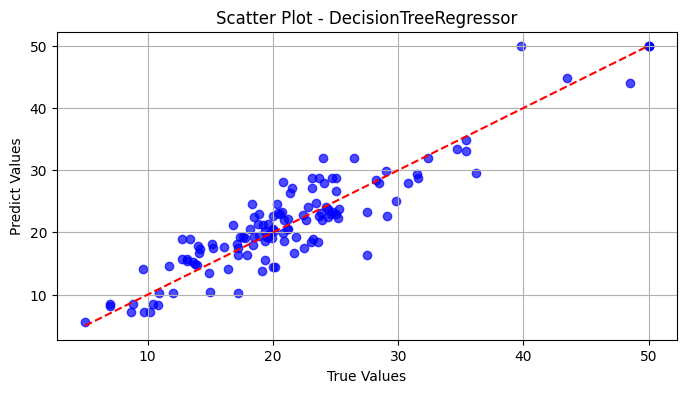

In [111]:
scatter_plot(y_test, predictions_1, model)

#### Residual Plot

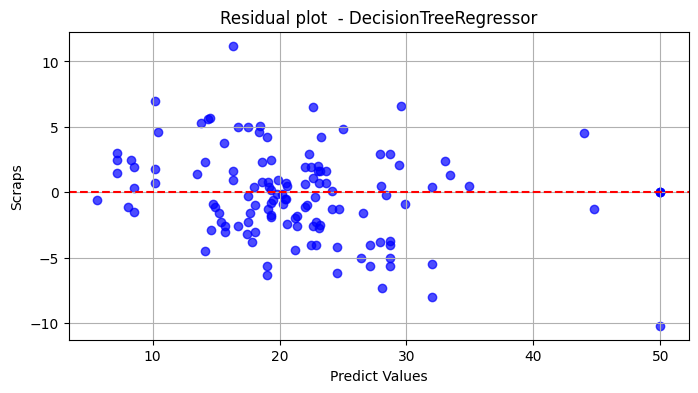

In [112]:
residual_plot(y_test,predictions_1, model)

###  DTR with GridSearch

In [113]:
params = {
    'criterion': ['absolute_error', 'friedman_mse', 'poisson', 'squared_error'],
    'max_depth': [2*x for x in range(2,10)],
    'min_samples_leaf': [4*x for x in range(5,15)],
    'min_samples_split': [4*x for x in range(5,10)]
}

grid_search=GridSearchCV(model,param_grid=params,scoring='neg_mean_squared_error', n_jobs=5,cv=3,verbose=1)
grid_search.fit(x_train,y_train)

Fitting 3 folds for each of 1600 candidates, totalling 4800 fits


GridSearchCV(cv=3, estimator=DecisionTreeRegressor(), n_jobs=5,
             param_grid={'criterion': ['absolute_error', 'friedman_mse',
                                       'poisson', 'squared_error'],
                         'max_depth': [4, 6, 8, 10, 12, 14, 16, 18],
                         'min_samples_leaf': [20, 24, 28, 32, 36, 40, 44, 48,
                                              52, 56],
                         'min_samples_split': [20, 24, 28, 32, 36]},
             scoring='neg_mean_squared_error', verbose=1)

In [114]:
predictions_2 = grid_search.predict(x_test)
metrics('DecisionTreeRegressor with GridSearch', y_test, predictions_2)

#### Scatter Plot

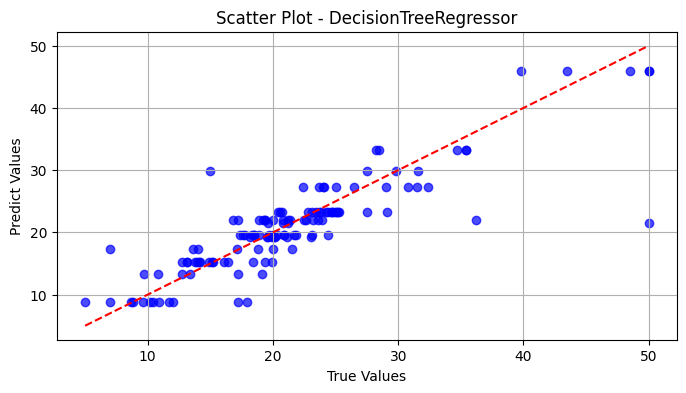

In [115]:
scatter_plot(y_test, predictions_2, model)

#### Residual Plot

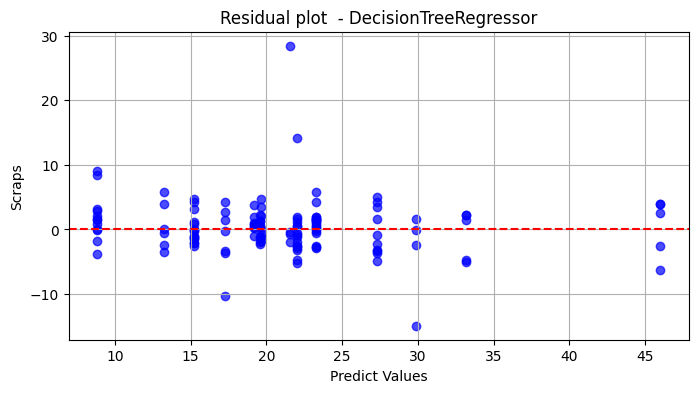

In [116]:
residual_plot(y_test,predictions_2, model)

## 5.2 RandomForestRegressor

In [117]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(n_estimators=200,criterion='absolute_error',max_depth=15)

rfr.fit(x_train, y_train)
predictions_3 = rfr.predict(x_test)
metrics('Random Forest', y_test, predictions_3)

#### Scatter Plot

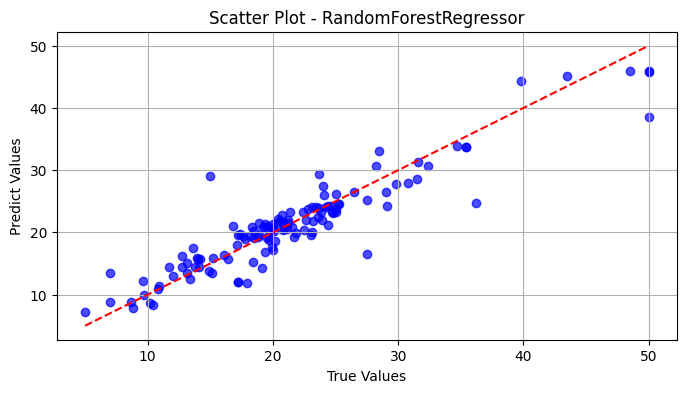

In [118]:
scatter_plot(y_test, predictions_3, rfr)

#### Residual Plot

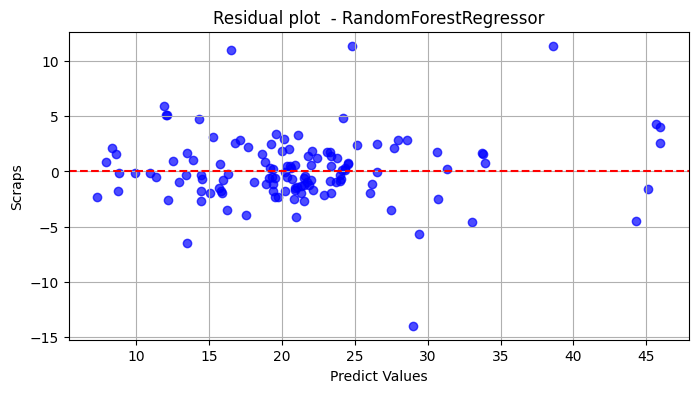

In [119]:
residual_plot(y_test,predictions_3, rfr)

## 5.3 DecisionTreeRegressor with Bagging

In [120]:
from sklearn.ensemble import BaggingRegressor

br = BaggingRegressor(DecisionTreeRegressor(max_depth=15,criterion='absolute_error'),n_estimators=150,bootstrap=True)

br.fit(x_train, y_train)
predictions_4 = br.predict(x_test)
metrics('Bagging Regresor', y_test, predictions_4)

#### Scatter Plot

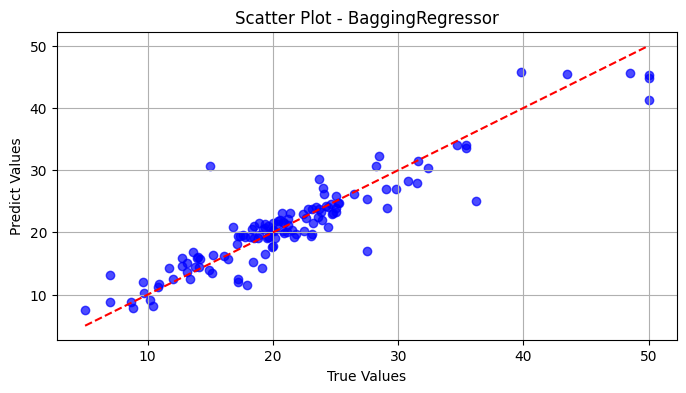

In [121]:
scatter_plot(y_test, predictions_4, br)

#### Residual Plot

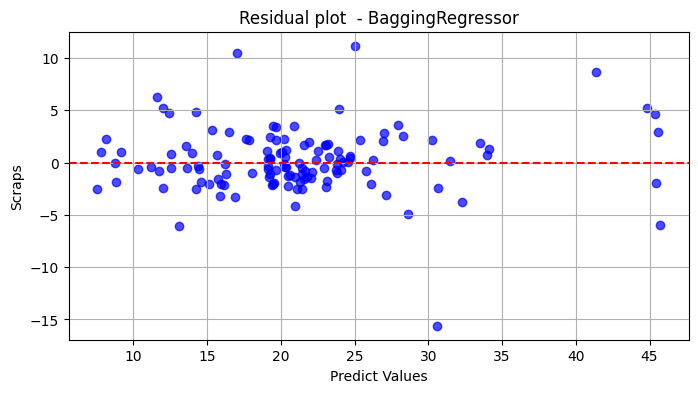

In [122]:
residual_plot(y_test,predictions_4, br)

## 5.4 AdaptiveBoostRegressor

In [167]:
from sklearn.ensemble import AdaBoostRegressor

adab = AdaBoostRegressor(estimator=DecisionTreeRegressor(max_depth=15,criterion='absolute_error'), n_estimators=150, learning_rate=0.15, loss='square')

adab.fit(x_train, y_train)
predictions_5 = adab.predict(x_test)
metrics('AdaBoostRegressor', y_test, predictions_5)

#### Scatter Plot

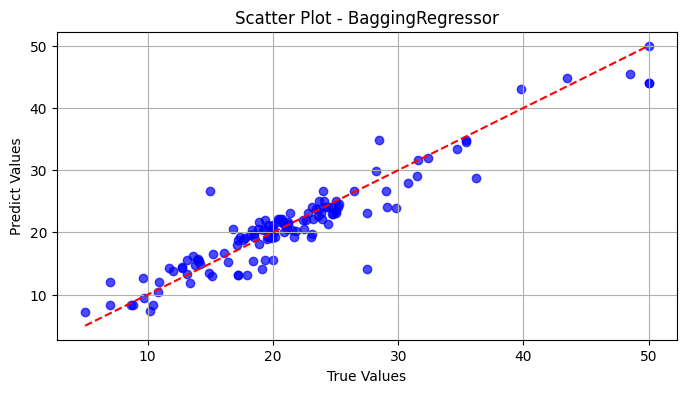

In [168]:
scatter_plot(y_test, predictions_5, br)

#### Residual Plot

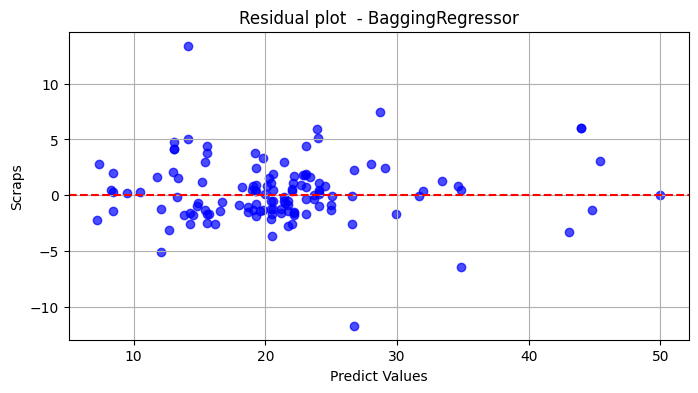

In [169]:
residual_plot(y_test,predictions_5, br)

## 5.5 GradientBoostingRegressor

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor()

gb = GradientBoostingRegressor()

#### Scatter Plot

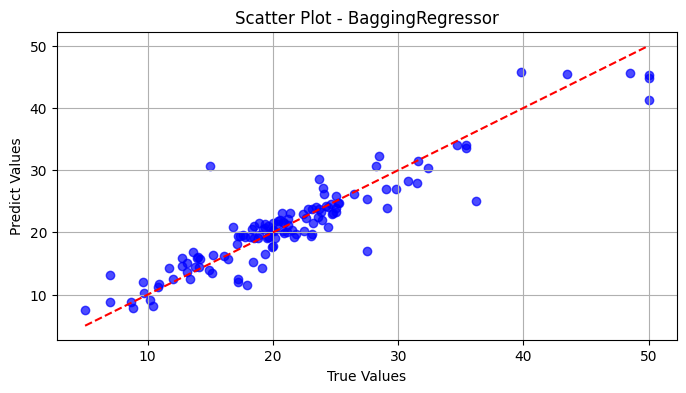

In [ ]:
scatter_plot(y_test, predictions_6, gr)

#### Residual Plot

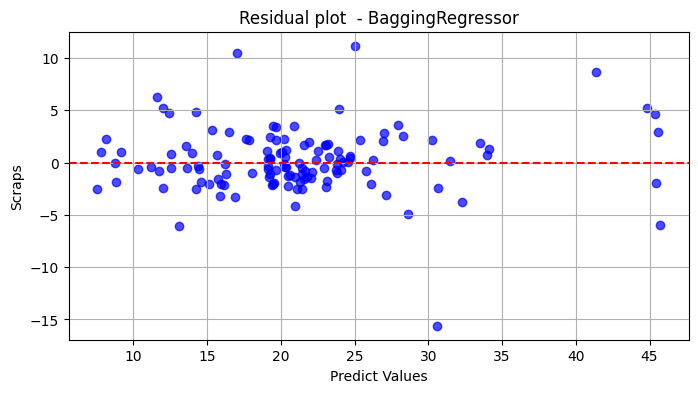

In [ ]:
residual_plot(y_test,predictions_6, gb)

# 6. Model Evaluation

In [170]:
pd.DataFrame(metrics_list, columns=['model','rmse','mse','r2'])

,model,rmse,mse,r2
0,DecisionTreeRegressor (per default),3.386402,11.467717,0.836239
1,DecisionTreeRegressor with GridSearch,4.244322,18.014272,0.742753
2,Random Forest,3.073773,9.448082,0.865080
3,Bagging Regresor,3.065083,9.394736,0.865842
4,AdaBoostRegressor,2.951204,8.709606,0.875625
5,AdaBoostRegressor,2.941169,8.650472,0.876470
6,AdaBoostRegressor,2.944797,8.671831,0.876165
7,AdaBoostRegressor,2.800285,7.841594,0.888021
8,AdaBoostRegressor,2.880548,8.297559,0.881509
9,AdaBoostRegressor,2.826614,7.989744,0.885905
